In [60]:
import gc
import pandas as pd
from sklearn.metrics import accuracy_score, \
    precision_score, \
    recall_score, \
    ConfusionMatrixDisplay, \
    f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt

In [61]:
PATH = "../data"
DATASET = 'news_29_80k'

data = pd.read_csv(f"{PATH}/dataset/{DATASET}.csv").dropna()

In [62]:
import nltk 
nltk.data.path.append("C:/Working directory/ml-projects/aiNews/requirements/nltk_data/")
nltk.set_proxy('http://130.100.7.222:1082')

In [63]:
from sklearn.model_selection import train_test_split

X = data.drop(["id", "genre"], axis=1)
y = data["genre"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=.2)

stemmer = SnowballStemmer(language="russian")
stop_words = stopwords.words("russian")

In [64]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

X_train['channel'] = encoder.fit_transform(X_train['channel'])
X_test['channel'] = encoder.transform(X_test['channel'])


In [66]:
from sklearn.preprocessing import Normalizer

subset_to_normalize = ["channel", "word_count", "sign_count", "smile_count"]
normalizer = Normalizer()

X_train[subset_to_normalize]  = normalizer.fit_transform(X_train[subset_to_normalize])
X_test[subset_to_normalize] = normalizer.transform(X_test[subset_to_normalize])


In [68]:
import string 

def text_to_tokens(text: str) -> list:
    tokens = word_tokenize(text, language="russian")
    tokens = [i for i in tokens if i not in string.punctuation]
    tokens = [i for i in tokens if i not in stop_words]
    tokens = [stemmer.stem(i) for i in tokens]
    return tokens


vectorizer = TfidfVectorizer(tokenizer=text_to_tokens)
X_train = vectorizer.fit_transform(X_train['text'])
X_test = vectorizer.transform(X_test['text'])
gc.collect()


c:\Working directory\ml-projects\aiNews\.venv\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


286

In [69]:
classifier = LogisticRegression(
    penalty="elasticnet", random_state=42, C=.9, solver="saga", l1_ratio=.4)
model = classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [71]:
import scikitplot as skplt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))
print(precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
print(recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
print(accuracy_score(y_true=y_test, y_pred=y_pred))



              precision    recall  f1-score   support

           1       0.60      0.60      0.60       494
           2       0.69      0.71      0.70       468
           3       0.44      0.48      0.46       442
           4       0.64      0.80      0.71       684
           5       0.82      0.81      0.82       478
           6       0.71      0.67      0.69       307
           7       0.95      0.91      0.93       539
           8       0.65      0.81      0.72       609
           9       0.74      0.64      0.68       468
          10       0.73      0.67      0.70       334
          11       0.93      0.95      0.94       484
          12       0.74      0.67      0.70       467
          13       0.83      0.75      0.79       404
          14       0.79      0.87      0.83       461
          15       0.96      0.93      0.95       438
          16       0.89      0.90      0.90       480
          17       0.77      0.80      0.78       512
          18       0.81    

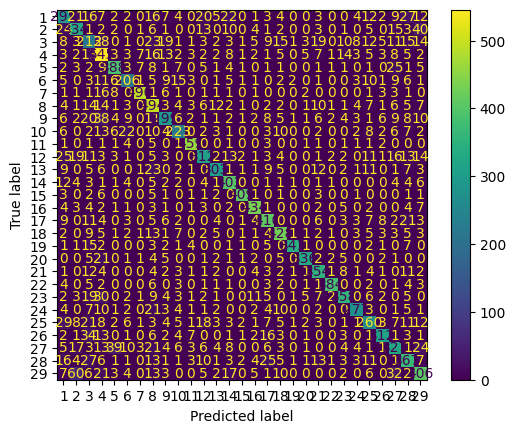

In [72]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred)
plt.show()